# Himmelsk Mekanikk

Vi skal her forsøke å modellere og beregne bevegelsene til himmellegemene. Solen, planetene, måner og satelitter er styrt av kreftene gitt av deres gjennsidige tiltrekning -- Gravitasjon.

## To legemer der den ene har mye større masse enn den andre

Jordens bane rundt solen eller en satelitts bane rundt jorden er begge eksempler der det minste legemets masse,
til en viss grad, er neglisjerbar sammenlignet med massen til det største legemet. I sol/jord-systemet antar vi
derfor at solen ligger i ro med midtpunkt i $\mathbf{0}\in \mathbb{R}^3$. Jorden trekkes mot solen med en kraft som er *omvendt proposjonal med kvadratet av avstanden*. Dvs., hvis posisjonen til jorden ved tiden $t$ er gitt av funksjonen $\mathbf{x}\colon [0,\infty)\to \mathbb{R}^3$, så er kraften på jorden lik
$$-C\frac{\hat{\mathbf{x}}(t)}{|\mathbf{x}(t)|^2}$$
der $C = GMm >0$ er en konstant og der $\hat{\mathbf{x}} := \mathbf{x}/|\mathbf{x}|$ er enhetsvektoren i retning $\mathbf{x}$, dvs. i retning jorden fra solen. Ettersom $\mathbf{F}=m\mathbf{a}$ der $\mathbf{a} = \mathbf{x}''$ er akselerasjonsvektoren til jorden, er jordens posisjon bestemt av den autonome andreordens ordinære differensialligningen
$$\mathbf{x}''= -GM\frac{\hat{\mathbf{x}}}{|\mathbf{x}|^2}.$$
For å kunne ha forhåpninger om en unik løsning, må vi vite posisjonen $\mathbf{x_0}$ og hastighetsvektoren $\mathbf{v_0}$ i starttidspunktet $t=0$. Konstanten GM kan settes til 1 ved å velge passende tids- og lengdeenheter. Tilsammen gir dette følgende *initialverdiproblem*
$$
\begin{align}
\mathbf{x}'' &= -\frac{\hat{\mathbf{x}}}{|\mathbf{x}|^2},\\
\mathbf{x}(0) &= \mathbf{x_0},\\
\mathbf{x}'(0) &= \mathbf{v_0}.
\end{align}
$$

### Omskriving til et førsteordens system

Det andreordens 3x3-systemet over kan omskrives til et *førsteordens* 6x6-system ved å la $\mathbf{v}(t) := \mathbf{x}'(t)$, og deretter finne differensialligningen for den ukjente funksjonen $\mathbf{y}\colon [0,\infty)\to\mathbb{R}^6$,
$$\mathbf{y}(t) := \begin{bmatrix} \mathbf{x}(t)\\ \mathbf{v}(t)\end{bmatrix}.$$
Da er nemlig
$$
\begin{align}
\mathbf{y}' &= \mathbf{f}(\mathbf{y}),\\
\mathbf{y}(0) &= \mathbf{y_0},
\end{align}
$$
der *vektorfeltet* $\mathbf{f}\colon \mathbb{R}^6\to\mathbb{R}^6$ er gitt ved
$$\mathbf{f}(\mathbf{y}) = \mathbf{f}(\mathbf{x},\mathbf{v}) := \begin{bmatrix} \mathbf{v}\\ -\frac{\hat{\mathbf{x}}}{|\mathbf{x}|^2}\end{bmatrix},$$
og der $\mathbf{y_0} := [\mathbf{x_0}, \mathbf{v_0}]^\top$.

### Implementering, Euler og Heun

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Koden for den *skalare* Eulers metode kan se ca sånn ut:

In [2]:
def euler_skalar(y0, t0, T, f, N):
    t = np.linspace(t0,T,N+1)
    tau = (T-t0)/N
    y = np.zeros(N)
    y[0] = y0
    for k in range(N+1):
        y[k+1] = y[k] + tau*f(t[k],y[k])
    return (t,y)

Vi generaliserer denne koden slik at den også kan håndtere systemer:

In [3]:
def euler(y0, t0, T, f, N):
    t = np.linspace(t0,T,N+1)
    tau = (T-t0)/N
# Lengden d på initialvektoren y0 bestemmer størrelsen på systemet
    d = np.size(y0)
# Løsningen er N+1 vektorer med lengde d. Vi samler disse i en d x (N+1)-matrise y
    y = np.zeros((d,N+1))
# Initialverdien y0 lagres i den første kolonnen (indeks 0) i y
    y[:,0] = y0
    for k in range(N):
        y[:,k+1] = y[:,k] + tau*f(t[k],y[:,k])
    return (t,y)

Koden for Heuns metode på systemer blir

In [4]:
def heun(y0, t0, T, f, N):
    t = np.linspace(t0,T,N+1)
    tau = (T-t0)/N
    d = np.size(y0)
    y = np.zeros((d,N+1))
    y[:,0] = y0
    for k in range(N):
        k1 = f(t[k], y[:,k])
        k2 = f(t[k+1], y[:,k] + tau*k1)
        y[:,k+1] = y[:,k] + 0.5*tau*(k1+k2) 
    return (t,y)

Deretter må funksjonen $\mathbf{f}$ fra vårt initialverdiproblem implementeres. Merk at $\frac{\hat{\mathbf{x}}}{|\mathbf{x}|^2} = \frac{\mathbf{x}}{|\mathbf{x}|^3}$ der sistnevnte uttrykk krever færre regneoprasjoner.

In [5]:
def f(t,y):
    d = np.size(y)
    x = y[:int(d/2)]
    v = y[int(d/2):]
    f2 = -(np.linalg.norm(x))**(-3)*x
    return np.hstack((v,f2))

Vi tester funksjonen $\mathbf{f}$.

In [6]:
y = np.array([3,4,1,2])
f(1,y)

array([ 1.   ,  2.   , -0.024, -0.032])

Man kan vise at løningene $\mathbf{x}$ og $\mathbf{v}$ vil holde seg i planet utspent av $\mathbf{x}_0$ og $\mathbf{v}_0$. F.eks., hvis $\mathbf{x}_0 = [1,0,0]^\top$ og $\mathbf{v}_0 = [0,1,0]^\top$, så vil $z$-verdien forbli 0. Initialverdiproblemet kan derfor reduseres til et $4\times 4$-system der $\mathbf{x}_0,\mathbf{v}_0\in\mathbb{R}^2$. Under løser vi problemet med henholdsvis Eulers og Heuns metode på tidsintervallet $[0,5]$ og med $\mathbf{x}_0 = [1,0]^\top$ og $\mathbf{v}_0 = [0,0.4]^\top$.

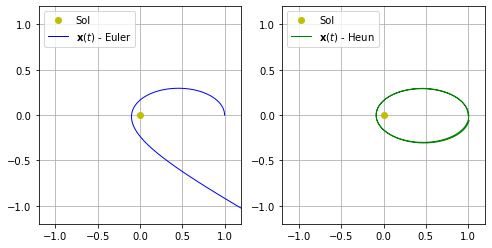

In [7]:
tau = 1/400
T = 5
N = int(T/tau)
y0 = np.array([1,0,0,0.4])

t,y_euler = euler(y0,0,T,f,N)
x1_euler = y_euler[0,:]
x2_euler = y_euler[1,:]

t,y_heun = heun(y0,0,T,f,N)
x1_heun = y_heun[0,:]
x2_heun = y_heun[1,:]

fig, axes = plt.subplots(1,2,figsize=(8,4))


axes[0].plot(0,0,'yo')
axes[0].plot(x1_euler,x2_euler,'b',lw=1)
axes[0].set_xlim(-1.2,1.2)
axes[0].set_ylim(-1.2,1.2)
axes[0].grid()
axes[0].legend(['Sol', '$\mathbf{x}(t)$ - Euler'], loc="upper left")

axes[1].plot(0,0,'yo')
axes[1].plot(x1_heun,x2_heun,'g',lw=1)
axes[1].set_xlim(-1.2,1.2)
axes[1].set_ylim(-1.2,1.2)
axes[1].grid()
axes[1].legend(['Sol', '$\mathbf{x}(t)$ - Heun'], loc="upper left")

#axes[0].grid()
#ax.plot(x1_heun,x2_heun)
#ax.legend(['Sol', '$\mathbf{x}(t)$ - Euler', '$\mathbf{x}(t)$ - Heun'], loc="upper left")


Eulers metode feiler veldig etter jorden kommer nær solen. Man kan vise at løsninger av initialverdiproblemet har *konstant energi*:
$$E(t) := \frac{1}{2}|\mathbf{x}'(t)|^2 - \frac{1}{|\mathbf{x}(t)|} = const.$$
En plot av energien for de numeriske løsningene kan derfor si noe om nøyaktigheten.

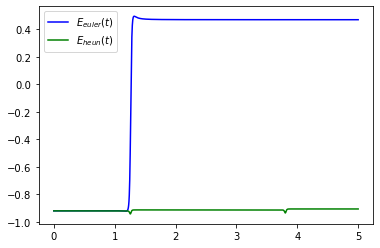

In [8]:
x_e = y_euler[:2]
v_e = y_euler[2:]

x_h = y_heun[:2]
v_h = y_heun[2:]

energi_e = np.zeros(N+1)
energi_h = np.zeros(N+1)

for k in range(N+1):
    energi_e[k] = 0.5*np.dot(v_e[:,k],v_e[:,k]) - 1/(np.linalg.norm(x_e[:,k]))
    energi_h[k] = 0.5*np.dot(v_h[:,k],v_h[:,k]) - 1/(np.linalg.norm(x_h[:,k]))

plt.plot(t,energi_e,'b')
plt.plot(t,energi_h,'g')
plt.legend(["$E_{euler}(t)$", "$E_{heun}(t)$"], loc="upper left")

Figurene over viser bare banen til løsningen og ikke hvor fort den beveger seg. For å få en fullverdig visualisering må man lage en animasjon:

In [9]:
%matplotlib notebook

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [11]:
dt = 1/400
T = 5
N = int(T/dt)
y0 = np.array([1,0,0,0.4])
t,y = heun(y0,0,T,f,N)
x1 = y[0,:]
x2 = y[1,:]


fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,xlim=(-1.3,1.3), ylim=(-1.3,1.3))
line, = ax.plot([],[],'go-')
ax.grid()
ax.plot(0,0,'yo-')

a = 4

def animate(frame_num):
    line.set_data(x1[frame_num*a],x2[frame_num*a])
    return line,

anim = FuncAnimation(fig, animate, frames=int(N/a), interval=50, blit = True)
plt.show()

<IPython.core.display.Javascript object>

## To planeter og én satelitt

Anta nå at vi har to planeter med lik masse som går i bane rundt deres felles tyngdepunkt. I dette gravitasjonsfeltet svever også en satelitt med neglisjerbar masse i forhold til planetene. La satelitten ha posisjon $\mathbf{x}_1(t)$ ved tiden $t$, og la planetene ha posisjon $\mathbf{x}_2(t)$ og $\mathbf{x}_3(t)$.
Differensialligningene blir da
$$
\begin{align}
\mathbf{x}_1'' &= \frac{\widehat{\mathbf{x}_2 - \mathbf{x}_1}}{|\mathbf{x}_2 - \mathbf{x}_1|^2} + \frac{\widehat{\mathbf{x}_3 - \mathbf{x}_1}}{|\mathbf{x}_3 - \mathbf{x}_1|^2},\\
\mathbf{x}_2'' &= \frac{\widehat{\mathbf{x}_3 - \mathbf{x}_2}}{|\mathbf{x}_3 - \mathbf{x}_2|^2},\\
\mathbf{x}_3'' &= \frac{\widehat{\mathbf{x}_2 - \mathbf{x}_3}}{|\mathbf{x}_2 - \mathbf{x}_3|^2}.
\end{align}
$$
Vi ser at $\mathbf{x}_3'' = -\mathbf{x}_2''$. Hvis $\mathbf{x}_3(0) = -\mathbf{x}_2(0)$ og $\mathbf{x}_3'(0) = -\mathbf{x}_2'(0)$, så vil også $\mathbf{x}_3(t) = -\mathbf{x}_2(t)$ for alle $t$ og planetene vil gå i diametrale baner rundt origo. I såfall kan systemet over forenkles til
$$
\begin{align}
\mathbf{x}_1'' &= \frac{\widehat{\mathbf{x}_2 - \mathbf{x}_1}}{|\mathbf{x}_2 - \mathbf{x}_1|^2} - \frac{\widehat{\mathbf{x}_2 + \mathbf{x}_1}}{|\mathbf{x}_2 + \mathbf{x}_1|^2},\\
\mathbf{x}_2'' &= -\frac{\widehat{\mathbf{x}_2}}{4|\mathbf{x}_2|^2}.
\end{align}
$$

Vi antar også nå at all bevegelse skjer i ett plan og vi innfører notasjonen $\mathbf{y}\colon [0,\infty)\to\mathbb{R}^8$,
$$\mathbf{y}(t) := \begin{bmatrix} \mathbf{x}_1(t)\\ \mathbf{x}_2(t)\\ \mathbf{v}_1(t)\\ \mathbf{v}_2(t)\end{bmatrix}
$$
der $\mathbf{v}_i := \mathbf{x}_i'$.

Dette gir initialverdiproblemet
$$
\begin{align}
\mathbf{y}' &= \mathbf{f}(\mathbf{y}),\\
\mathbf{y}(0) &= \mathbf{y}_0,
\end{align}
$$
der $\mathbf{f}\colon \mathbb{R}^8\to\mathbb{R}^8$, er gitt ved
$$
\mathbf{f}(\mathbf{y}) = \mathbf{f}(\mathbf{x}_1,\mathbf{x}_2,\mathbf{v}_1,\mathbf{v}_2) := \begin{bmatrix} \mathbf{v}_1\\ \mathbf{v}_2\\ \frac{\widehat{\mathbf{x}_2 - \mathbf{x}_1}}{|\mathbf{x}_2 - \mathbf{x}_1|^2} - \frac{\widehat{\mathbf{x}_2 + \mathbf{x}_1}}{|\mathbf{x}_2 + \mathbf{x}_1|^2}\\ -\frac{\widehat{\mathbf{x}_2}}{4|\mathbf{x}_2|^2}\end{bmatrix}.
$$


Implementering av $\mathbf{f}$.

In [12]:
def f_3body(t,y):
    x1 = y[0:2]
    x2 = y[2:4]
    v1 = y[4:6]
    v2 = y[6:8]
    f3 = (np.linalg.norm(x2-x1))**(-3)*(x2-x1) - (np.linalg.norm(x2+x1))**(-3)*(x2+x1)
    f4 = -(np.linalg.norm(x2))**(-3)*x2
    return np.hstack((v1,v2,f3,f4))

In [13]:
y = np.array([8,7,6,5,4,3,2,1])
f_3body(0,y)

array([ 4.        ,  3.        ,  2.        ,  1.        , -0.09062146,
       -0.09030244, -0.01259379, -0.01049483])

In [14]:
dt = 1/800
T = 5
N = int(T/dt)
y0 = np.array([0,0,1,0,0,-1.25,0,0.8])
t,y = heun(y0,0,T,f_3body,N)
x1 = y[0,:]
y1 = y[1,:]
x2 = y[2,:]
y2 = y[3,:]



fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,xlim=(-1.3,1.3), ylim=(-1.3,1.3))
line, = ax.plot([],[],'go')
ax.grid()
#ax.plot(0,0,'yo-')

a = 8

def animate(i):
    line.set_data([x1[i*a], x2[i*a], -x2[i*a]],[y1[i*a], y2[i*a], -y2[i*a]])
    return line,

anim = FuncAnimation(fig, animate, frames=int(N/a), interval=50, blit = True)
plt.show()


<IPython.core.display.Javascript object>

Oppgave: Implementer den tre-stegs Runge-Kutta-metoden gitt av

In [15]:
a = np.array([[0, 0, 0],
             [1, 0, 0],
             [1/4, 1/4, 0]])
b = np.array([1/6, 1/6, 2/3])
c = np.array([0, 1, 1/2])

og bruk den til å løse problemet ovenfor.